In [2]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
 return datetime.strptime(x, '%Y %m %d')
dataset = read_csv('exercises_ed.csv',  parse_dates = [['year', 'month', 'day']], index_col=0, date_parser=parse)
# manually specify column names
dataset.columns = ["leg presses","leg curls","leg extensions","step ups","lunges","calf raises","squats","hamstring curl","reverse hyperextensions","lateral lunges"]
dataset.index.name = 'date'
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('exercises_ed_new.csv')

            leg presses  leg curls  leg extensions  step ups  lunges  \
date                                                                   
2024-04-01           36         36              24        72      80   
2024-04-02            0          0               0         0       0   
2024-04-03           80          0              24         0       0   
2024-04-04            0          0               0         0       0   
2024-04-05            0          0               0        20      20   

            calf raises  squats  hamstring curl  reverse hyperextensions  \
date                                                                       
2024-04-01           60       0               0                        0   
2024-04-02            0       0               0                        0   
2024-04-03           60      36              48                       45   
2024-04-04            0       0               0                        0   
2024-04-05            0      20        

C:\Users\User\AppData\Local\Temp\ipykernel_23264\2317724914.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv('exercises_ed.csv',  parse_dates = [['year', 'month', 'day']], index_col=0, date_parser=parse)


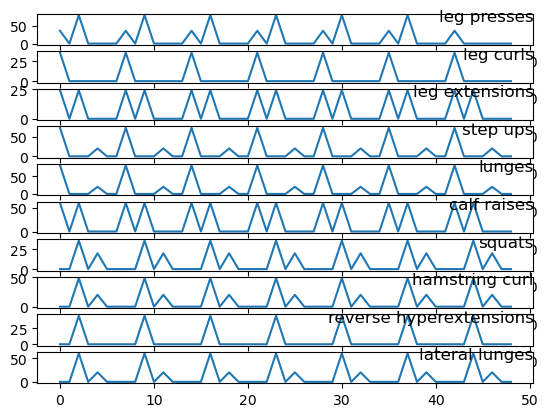

In [4]:
from matplotlib import pyplot
# load dataset
dataset = read_csv('exercises_ed_new.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

In [10]:
from pandas import DataFrame, concat, read_csv
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('exercises_ed_new.csv', header=0, index_col=0)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.45        1.0        1.0   1.000000       1.00        1.0   
2       0.00        0.0        0.0   0.000000       0.00        0.0   
3       1.00        0.0        1.0   0.000000       0.00        1.0   
4       0.00        0.0        0.0   0.000000       0.00        0.0   
5       0.00        0.0        0.0   0.277778       0.25        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var1(t)  var2(t)  var3(t)  \
1   0.000000   0.000000        0.0    0.000000      0.0      0.0      0.0   
2   0.000000   0.000000        0.0    0.000000      1.0      0.0      1.0   
3   1.000000   1.000000        1.0    1.000000      0.0      0.0      0.0   
4   0.000000   0.000000        0.0    0.000000      0.0      0.0      0.0   
5   0.555556   0.416667        0.0    0.333333      0.0      0.0      0.0   

    var4(t)  var5(t)  var6(t)   var7(t)   var8(t)  var9(t)  var10(t)  
1  0.000000     0.00      0.0  0.000000

In [11]:
# split into train and test sets
values = reframed.values
train = values[:30, :]
test = values[30:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(30, 1, 19) (30,) (18, 1, 19) (18,)


Epoch 1/50


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 2s - 2s/step - loss: 0.2411 - val_loss: 0.1878
Epoch 2/50
1/1 - 0s - 50ms/step - loss: 0.2334 - val_loss: 0.1856
Epoch 3/50
1/1 - 0s - 50ms/step - loss: 0.2294 - val_loss: 0.1821
Epoch 4/50
1/1 - 0s - 47ms/step - loss: 0.2240 - val_loss: 0.1778
Epoch 5/50
1/1 - 0s - 52ms/step - loss: 0.2179 - val_loss: 0.1731
Epoch 6/50
1/1 - 0s - 50ms/step - loss: 0.2116 - val_loss: 0.1710
Epoch 7/50
1/1 - 0s - 61ms/step - loss: 0.2091 - val_loss: 0.1685
Epoch 8/50
1/1 - 0s - 60ms/step - loss: 0.2056 - val_loss: 0.1657
Epoch 9/50
1/1 - 0s - 63ms/step - loss: 0.2014 - val_loss: 0.1628
Epoch 10/50
1/1 - 0s - 45ms/step - loss: 0.1971 - val_loss: 0.1600
Epoch 11/50
1/1 - 0s - 46ms/step - loss: 0.1930 - val_loss: 0.1573
Epoch 12/50
1/1 - 0s - 46ms/step - loss: 0.1894 - val_loss: 0.1540
Epoch 13/50
1/1 - 0s - 46ms/step - loss: 0.1851 - val_loss: 0.1512
Epoch 14/50
1/1 - 0s - 51ms/step - loss: 0.1814 - val_loss: 0.1491
Epoch 15/50
1/1 - 0s - 48ms/step - loss: 0.1784 - val_loss: 0.1461
Epoch 16/50
1/1 -

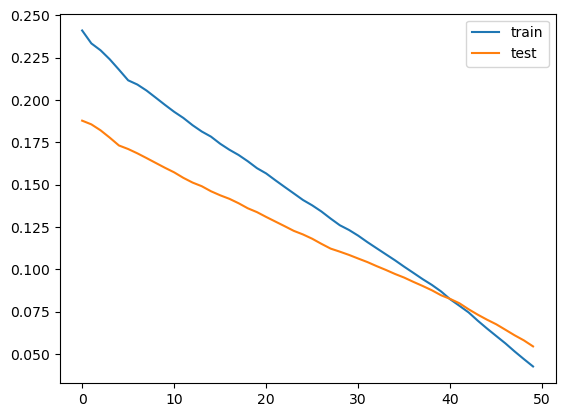

In [12]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
import numpy as np
from keras.losses import MeanSquaredError
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concat((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concat((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(MeanSquaredError(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [15]:
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.DataFrame({
    # Your data here as a Python dictionary
})

# Convert the date columns into a datetime format
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop the original year, month, and day columns as they are now redundant
data.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Move the date column to be the first column
data = data.set_index('date')

# Normalize the data (scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


KeyError: "None of [Index(['year', 'month', 'day'], dtype='object')] are in the [columns]"

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('exercises_ed.csv')

# Convert the date columns into a datetime format
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop the original year, month, and day columns as they are now redundant
data.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Move the date column to be the first column
data = data.set_index('date')

# Normalize the data (scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Number of past days to consider for predicting the next day
n_steps = 3
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])),
    Dense(y.shape[1])
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")

# Predicting future exercises
future_exercises = model.predict(X_test[-1].reshape(1, n_steps, X.shape[2]))
print("Predicted exercises for the next day:", future_exercises)

Epoch 1/50


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1570 - val_loss: 0.1559
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1552 - val_loss: 0.1544
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1535 - val_loss: 0.1530
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1518 - val_loss: 0.1517
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1502 - val_loss: 0.1505
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1486 - val_loss: 0.1493
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1471 - val_loss: 0.1482
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1456 - val_loss: 0.1471
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1441 - val_loss: 0.1461
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1426 - val_loss: 0.1451
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1412 - val_loss: 0.1441
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1398 - val_loss: 0.1432
Epoch 13/50
1/

Epoch 1/200


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.1638 - val_loss: 0.2296
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1554 - val_loss: 0.2201
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1179 - val_loss: 0.2113
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1378 - val_loss: 0.2030
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1360 - val_loss: 0.1945
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1320 - val_loss: 0.1863
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1334 - val_loss: 0.1780
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1004 - val_loss: 0.1722
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1347 - val_loss: 0.1674
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1267 - val_loss: 0.1617
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1159 - val_loss: 0.1572
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1121 - val_loss: 0.1544


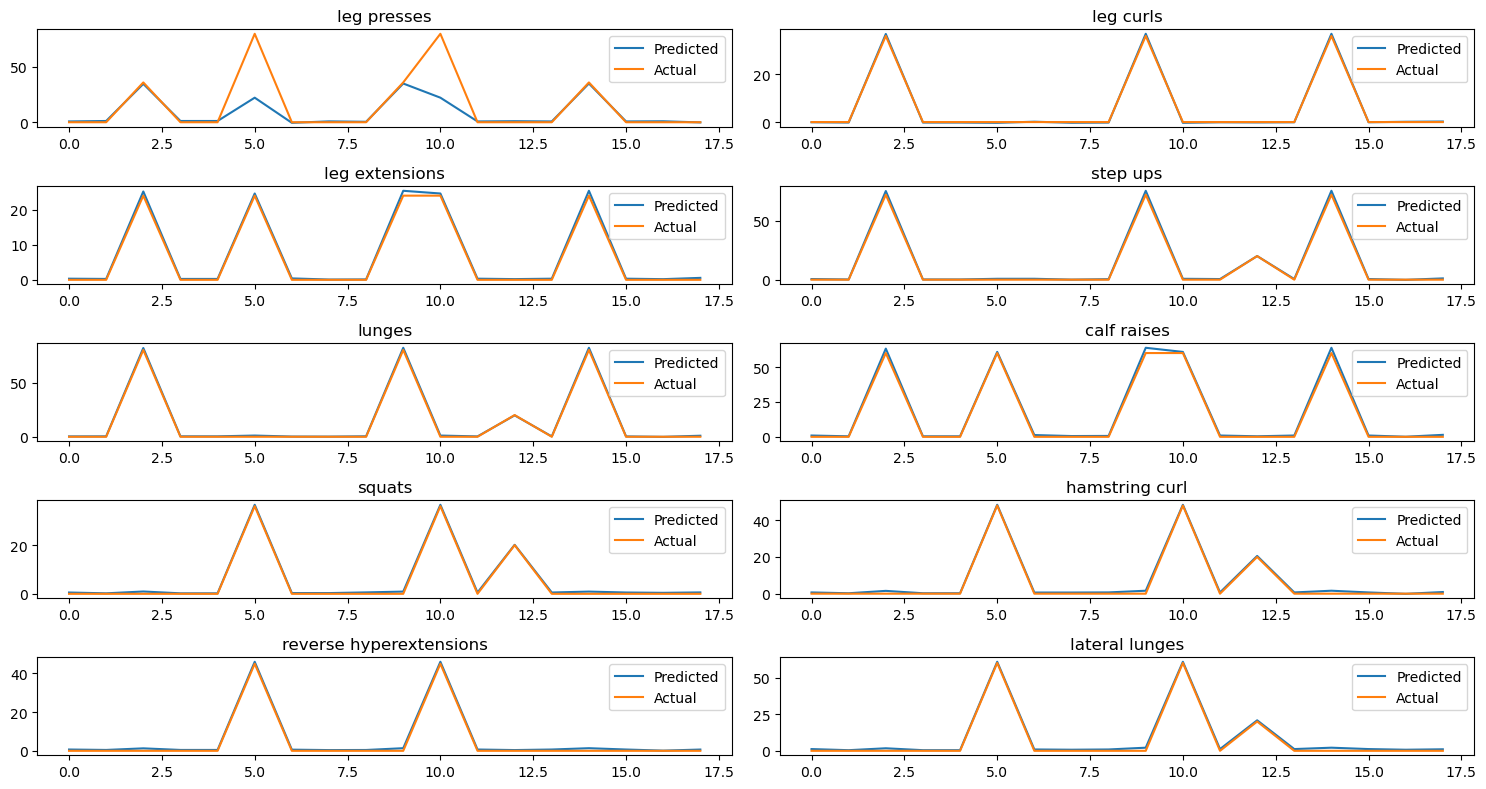

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('exercises_ed.csv')

# Convert the date columns into a datetime format
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop the original year, month, and day columns as they are now redundant
data.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Move the date column to be the first column
data = data.set_index('date')

# Normalize the data (scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Number of past days to consider for predicting the next day
n_steps = 5
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(n_steps, X.shape[2])),
    Dense(y.shape[1])
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.2)

# Predicting the last week of data in the test set
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
actual_rescaled = scaler.inverse_transform(y_test)

# Extract the last 7 days
last_week_predictions = predictions_rescaled[-18:]
last_week_actual = actual_rescaled[-18:]

# Plotting the results
plt.figure(figsize=(15, 8))
for i in range(last_week_predictions.shape[1]):
    plt.subplot(5, 2, i+1)
    plt.plot(last_week_predictions[:, i], label='Predicted')
    plt.plot(last_week_actual[:, i], label='Actual')
    plt.title(data.columns[i])
    plt.legend()
plt.tight_layout()
plt.show()

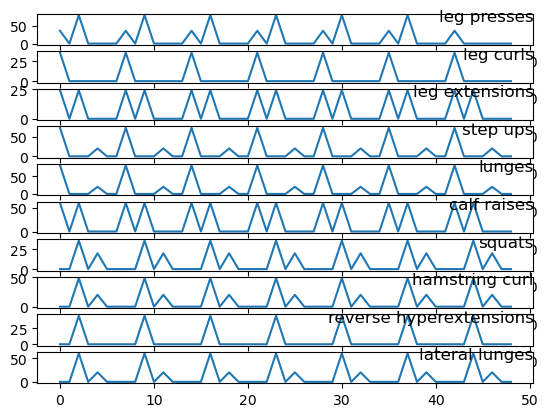

In [21]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

Epoch 1/200


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.1557 - val_loss: 0.2270
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1800 - val_loss: 0.2179
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1314 - val_loss: 0.2094
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1388 - val_loss: 0.2009
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1152 - val_loss: 0.1922
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1298 - val_loss: 0.1839
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1185 - val_loss: 0.1756
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1327 - val_loss: 0.1672
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1222 - val_loss: 0.1583
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1140 - val_loss: 0.1508
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1226 - val_loss: 0.1459
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1059 - val_loss: 0.1406
Ep

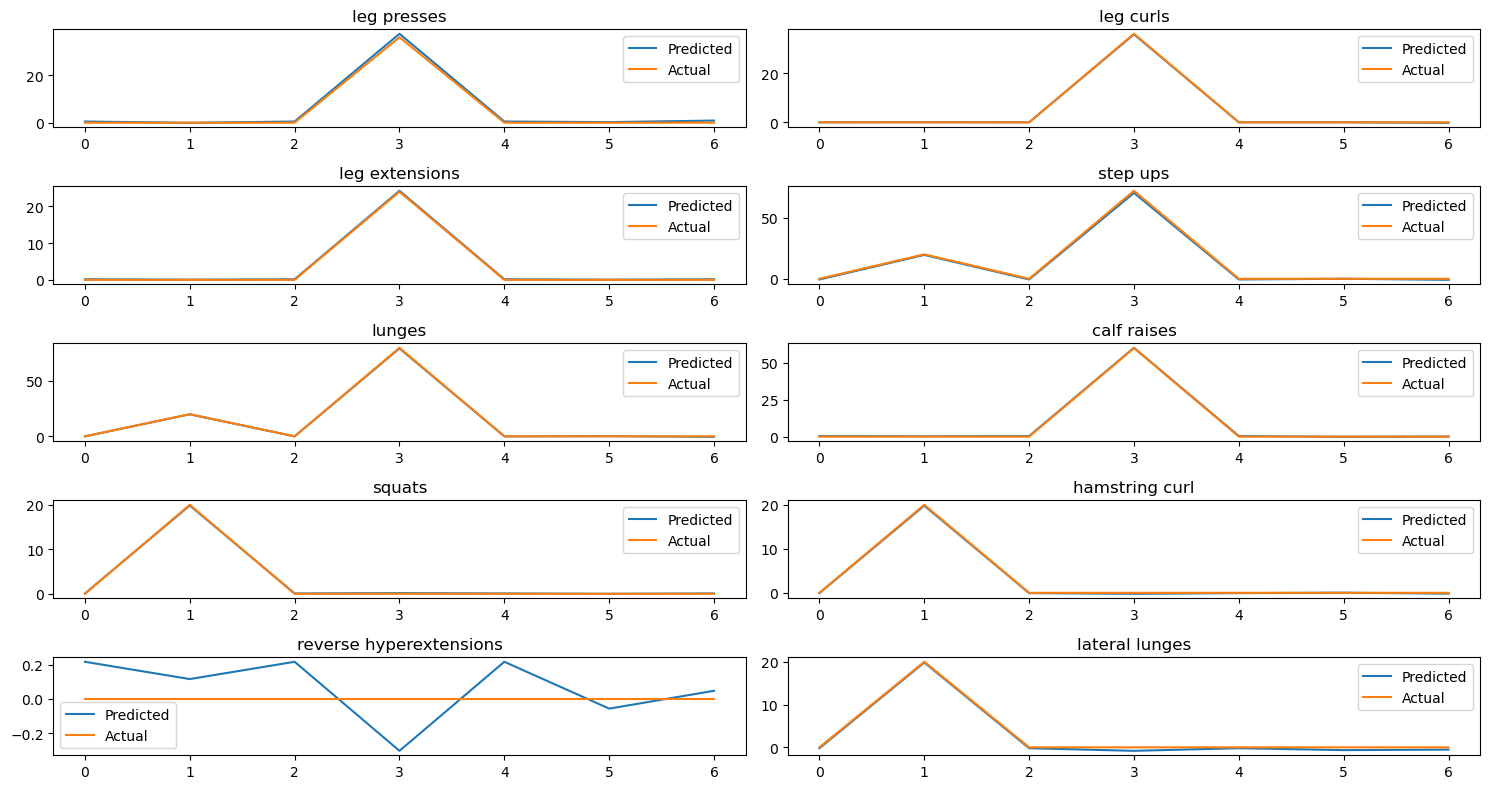

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Prediction for the new day: [[37. 36. 24. 70. 79. 60.  0.  0.  0.  0.]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'exercises_ed.csv'
data = pd.read_csv(file_path)

# Convert the date columns into a datetime format
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop the original year, month, and day columns as they are now redundant
data.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Move the date column to be the first column
data = data.set_index('date')

# Normalize the data (scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Number of past days to consider for predicting the next day
n_steps = 5
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(n_steps, X.shape[2])),
    Dense(y.shape[1])
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.2)

model.save("schedule.keras")

# Predicting the last week of data in the test set
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
actual_rescaled = scaler.inverse_transform(y_test)

# Extract the last 7 days
last_week_predictions = predictions_rescaled[-7:]
last_week_actual = actual_rescaled[-7:]

# Plotting the results
plt.figure(figsize=(15, 8))
for i in range(last_week_predictions.shape[1]):
    plt.subplot(5, 2, i+1)
    plt.plot(last_week_predictions[:, i], label='Predicted')
    plt.plot(last_week_actual[:, i], label='Actual')
    plt.title(data.columns[i])
    plt.legend()
plt.tight_layout()
plt.show()

# --- Prediction for a new day using the last 5 rows ---

# Select the last 5 rows of data for the new sequence
new_data = data.tail(n_steps)

# Normalize the new data
new_data_scaled = scaler.transform(new_data)

# Create a sequence from the new data
new_sequence = new_data_scaled.reshape((1, n_steps, new_data_scaled.shape[1]))

# Make the prediction
new_prediction = model.predict(new_sequence)

# Inverse transform the prediction to original scale
new_prediction_rescaled = scaler.inverse_transform(new_prediction)
        
for i in range(len(new_prediction_rescaled[0])):
     if new_prediction_rescaled[0][i] < 5:
         new_prediction_rescaled[0][i] = 0

print("Prediction for the new day:", np.round(new_prediction_rescaled,0))

In [14]:
from tensorflow.keras.models import load_model
new_model = load_model("schedule.keras")

predictions = new_model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
actual_rescaled = scaler.inverse_transform(y_test)

# --- Prediction for a new day using the last 5 rows ---

# Select the last 5 rows of data for the new sequence
new_data = data.tail(n_steps)

# Normalize the new data
new_data_scaled = scaler.transform(new_data)

# Create a sequence from the new data
new_sequence = new_data_scaled.reshape((1, n_steps, new_data_scaled.shape[1]))

# Make the prediction
new_prediction = new_model.predict(new_sequence)

# Inverse transform the prediction to original scale
new_prediction_rescaled = scaler.inverse_transform(new_prediction)
        
for i in range(len(new_prediction_rescaled[0])):
     if new_prediction_rescaled[0][i] < 5:
         new_prediction_rescaled[0][i] = 0

print("Prediction for the new day:", np.round(new_prediction_rescaled,0))
print("Perform 3 sets of the following:", new_prediction_rescaled//3)

headers = data.columns
header_list = headers.tolist()
a = "Perform 3 sets of the following:\n"

for i in range(len(new_prediction_rescaled[0])):
    if new_prediction_rescaled[0][i] != 0:
        a = a + " " + header_list[i+1] + ": " + str(int(new_prediction_rescaled[0][i]//3)) + "\n"

print(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Prediction for the new day: [[37. 36. 24. 70. 79. 60.  0.  0.  0.  0.]]
Perform 3 sets of the following: [[12. 11.  8. 23. 26. 20.  0.  0.  0.  0.]]
Perform 3 sets of the following:
 leg curls: 12
 leg extensions: 11
 step ups: 8
 lunges: 23
 calf raises: 26
 squats: 20



In [19]:
import sklearn
print(sklearn.__version__)

!pip install sklearn

1.2.2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [7]:
from datetime import datetime

formatted_date = datetime.now().strftime("%Y-%m-%d")
year = int(formatted_date[:4])
month = int(formatted_date[5:7])
day = int(formatted_date[8:10])

Formatted date: 2024-05-17
